# The ArcGIS API for Python: Intro to modules

## GIS Module


The main classes in the gis module are:
 - GIS : represents the GIS, either ArcGIS Online or an ArcGIS Enterprise
 - User : represents a GIS user
 - Role : represents the role of a GIS user
 - Group : represents a group in the GIS
 - Item : represents an Item in the GIS

<img src="https://developers.arcgis.com/assets/img/python-graphics/guide_gis_module_01.png" />

In [2]:
from arcgis.gis import GIS
gis = GIS??

```
GIS(
    url=None,
    username=None,
    password=None,
    key_file=None,
    cert_file=None,
    verify_cert=True,
    set_active=True,
    client_id=None,
    profile=None,
    **kwargs,
)
```

In [3]:
gis.content.search??

```
gis.content.search(
    query,
    item_type=None,
    sort_field='avgRating',
    sort_order='desc',
    max_items=10,
    outside_org=False,
    categories=None,
    category_filters=None,
)
```


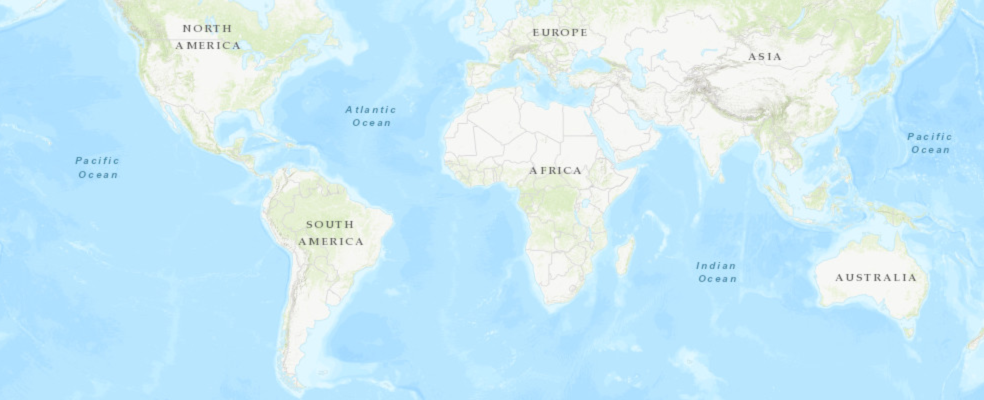

In [9]:
map1 = gis.map()
map1

```
gis.map(location=None, zoomlevel=None, mode='2D', geocoder=None)
```

In [44]:
gis.content.import_data??

```
Signature:
gis.content.import_data(
    df,
    address_fields=None,
    folder=None,
    item_id=None,
    **kwargs,
)
```

## Features Module

<b> - Accessing Feature Layers</b>

<b> - Querying Feature Layers</b>

<b> - Accessing Features from query results</b>

<img src="http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_features_01.png" />

In [11]:
search_results = gis.content.search??

```
Signature:
gis.content.search(
    query,
    item_type=None,
    sort_field='avgRating',
    sort_order='desc',
    max_items=10,
    outside_org=False,
    categories=None,
    category_filters=None,
)
```

In [14]:
# Access the first Item that's returned
type(search_results[0])

arcgis.gis.Item

In [24]:
layer = search_results[0].layers
layer

<FeatureLayer url:"http://sampleserver3.arcgisonline.com/ArcGIS/rest/services/SanFrancisco/311Incidents/FeatureServer/0">

In [25]:
layer.query??

```
Signature:
layer.query(
    where='1=1',
    out_fields='*',
    time_filter=None,
    geometry_filter=None,
    return_geometry=True,
    return_count_only=False,
    return_ids_only=False,
    return_distinct_values=False,
    return_extent_only=False,
    group_by_fields_for_statistics=None,
    statistic_filter=None,
    result_offset=None,
    result_record_count=None,
    object_ids=None,
    distance=None,
    units=None,
    max_allowable_offset=None,
    out_sr=None,
    geometry_precision=None,
    gdb_version=None,
    order_by_fields=None,
    out_statistics=None,
    return_z=False,
    return_m=False,
    multipatch_option=None,
    quantization_parameters=None,
    return_centroid=False,
    return_all_records=True,
    result_type=None,
    historic_moment=None,
    sql_format=None,
    return_true_curves=False,
    return_exceeded_limit_features=None,
    as_df=False,
    datum_transformation=None,
    **kwargs,
)
```

In [29]:
query_result1 = layer.query(where='<>',
                            out_fields='*')
len(query_result1.features)

9


## Geometry Module

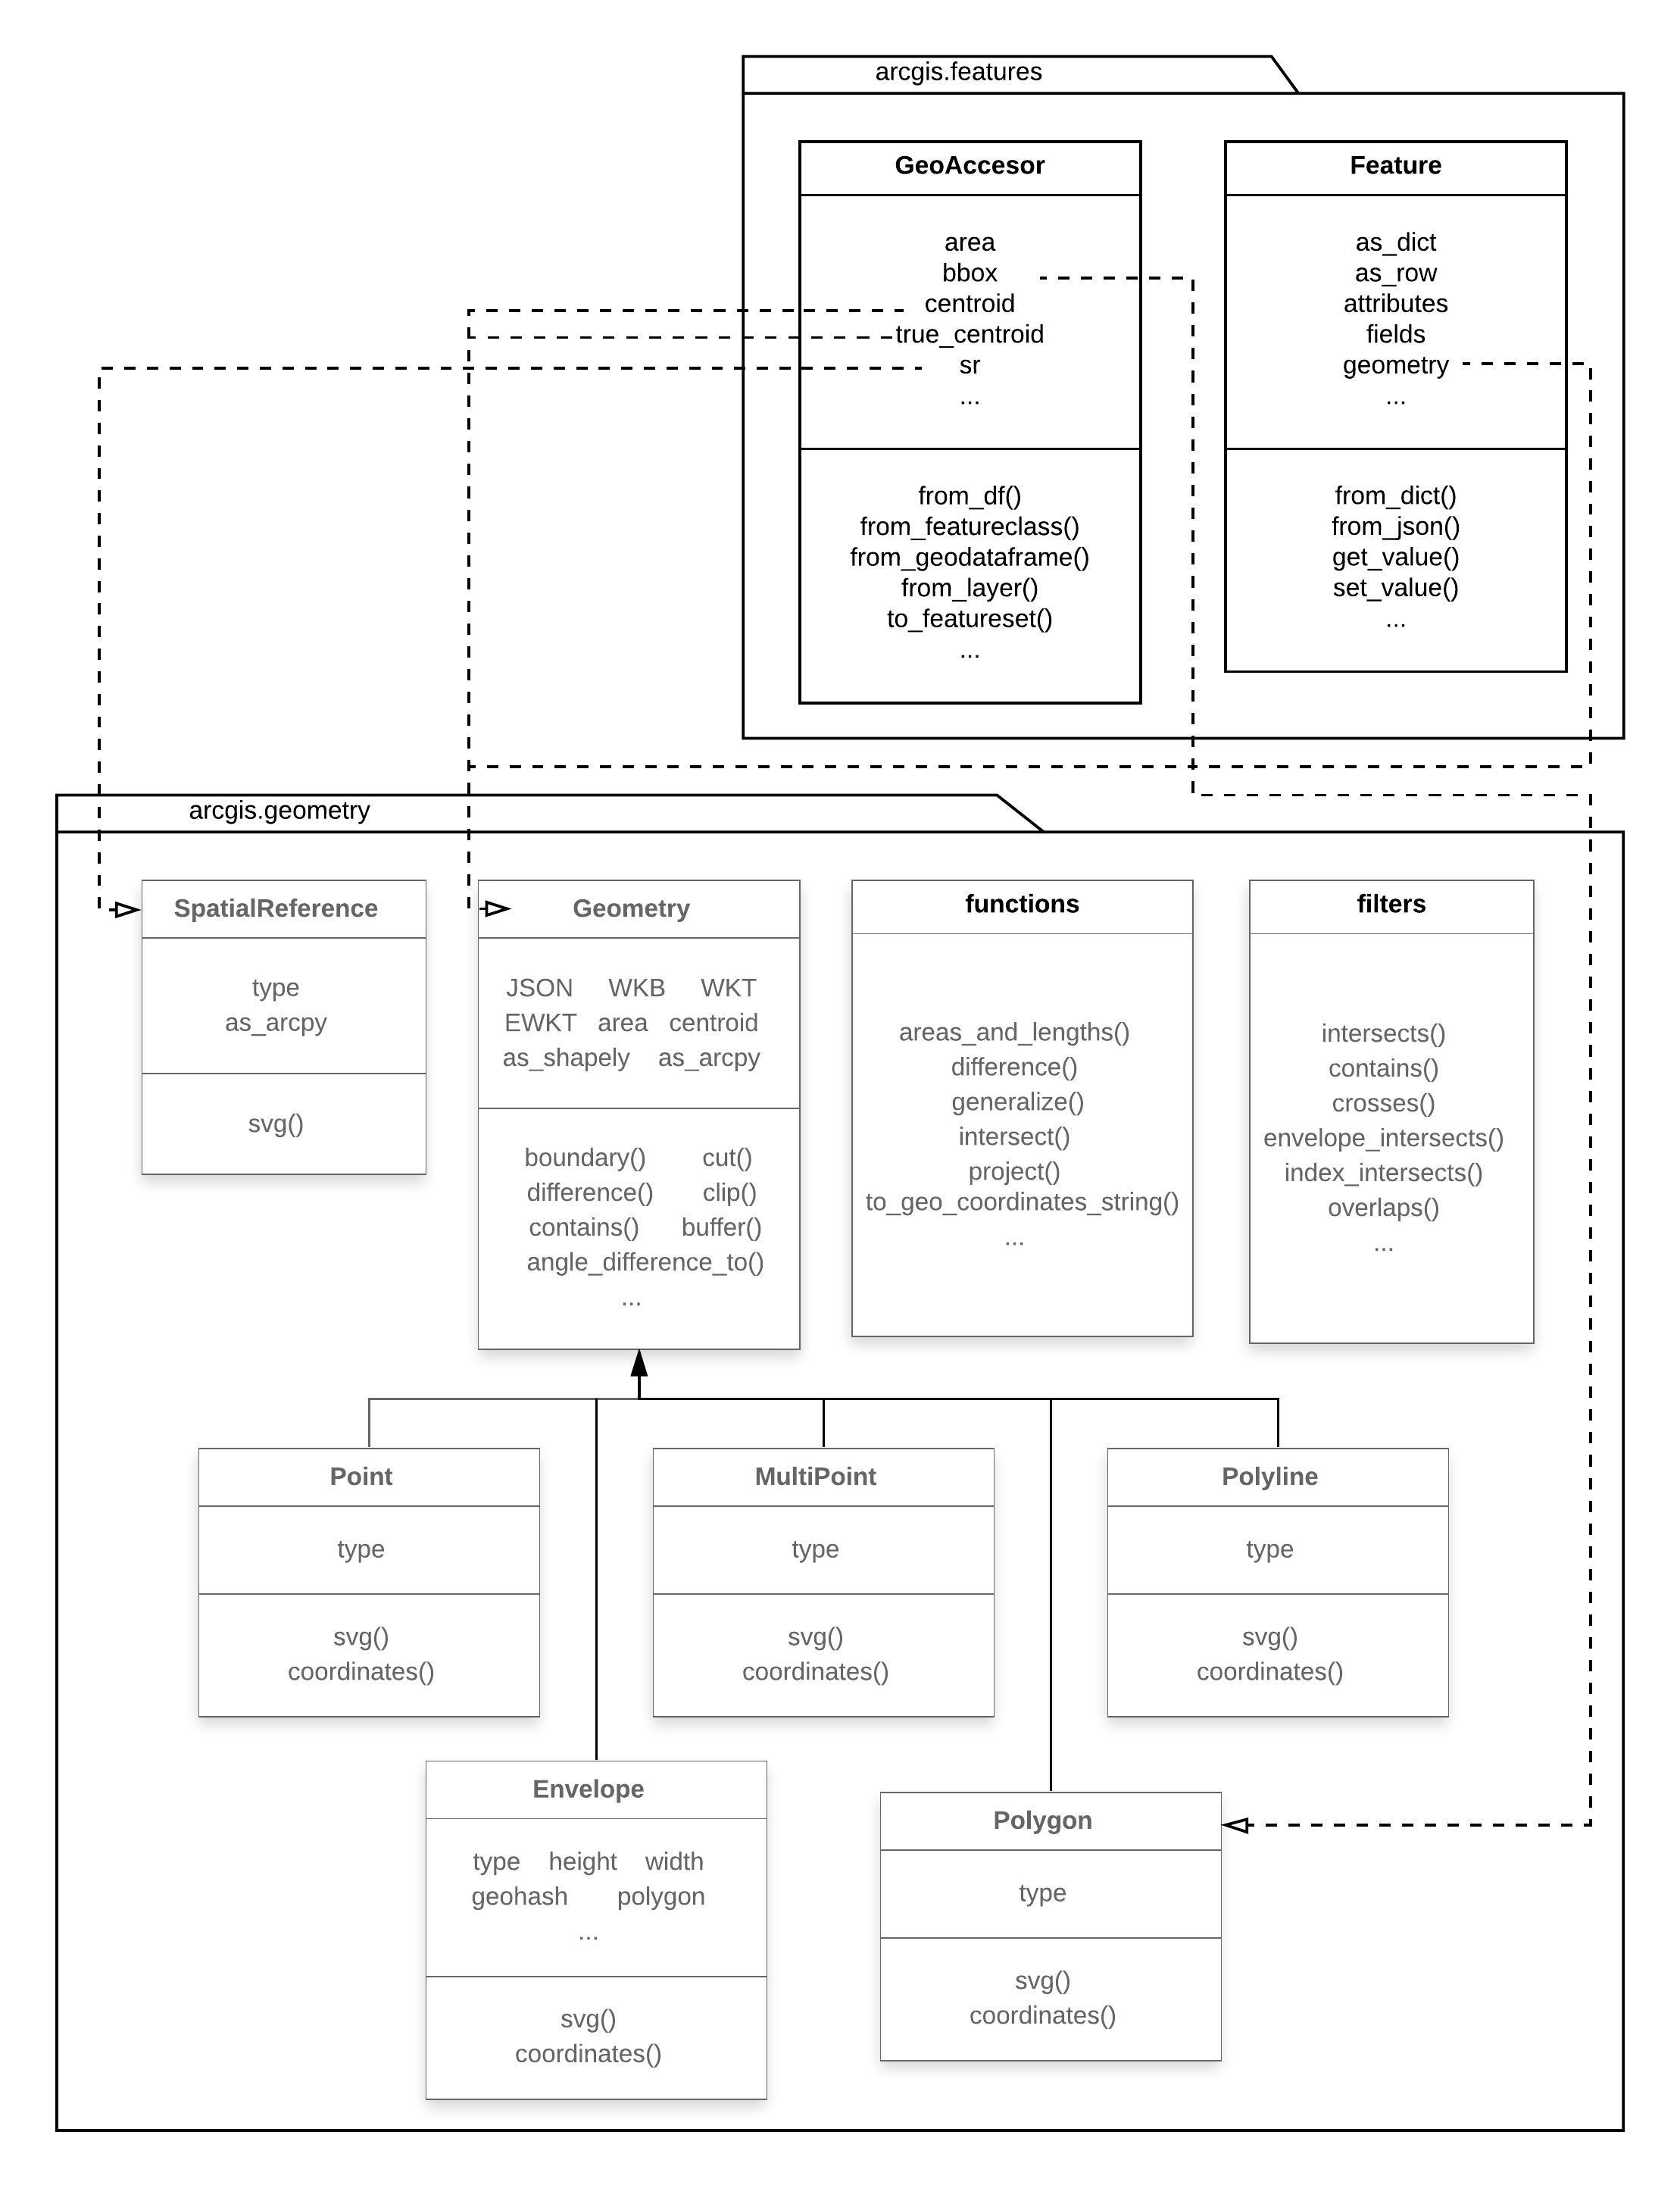

### Get geometries from Feature objects

In [34]:
# tax incentives
pp_fl = FeatureLayer('<Feature Layer URL>')
pp_fset = pp_fl.query("0=0")
pp_fset

<FeatureSet> 1 features

In [35]:
pp_sdf = pp_fset.sdf
pp_sdf.head()

,OBJECTID,NAME,WEB_URL,GIS_ID,SHAPE.AREA,SHAPE.LEN,SHAPE
0,1,Supermarket Tax Incentives,None,None,7.791449e+07,92968.194739,"{""rings"": [[[-8575637.457109949, 4713349.94595..."


In [ ]:
for pp_feature in pp_fset:
    if pp_feature.attributes["POPDENSITY"]>55000:
        print(pp_feature.attributes)

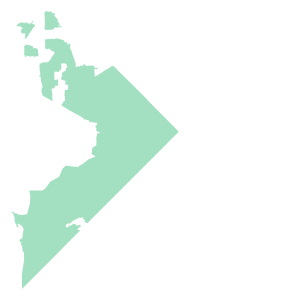

In [37]:
display(pp_sdf.spatial)

In [ ]:
# creates filter
intersects??

```
Signature: intersects(geometry, sr=None)
```

In [ ]:
# applying the filter
lyr.query(geometry_filter=<>)

```
lyr.query(
    where='1=1',
    out_fields='*',
    time_filter=None,
    geometry_filter=None,
    return_geometry=True,
    return_count_only=False,
    return_ids_only=False,
    return_distinct_values=False,
    return_extent_only=False,
    group_by_fields_for_statistics=None,
    statistic_filter=None,
    result_offset=None,
    result_record_count=None,
    object_ids=None,
    distance=None,
    units=None,
    max_allowable_offset=None,
    out_sr=None,
    geometry_precision=None,
    gdb_version=None,
    order_by_fields=None,
    out_statistics=None,
    return_z=False,
    return_m=False,
    multipatch_option=None,
    quantization_parameters=None,
    return_centroid=False,
    return_all_records=True,
    result_type=None,
    historic_moment=None,
    sql_format=None,
    return_true_curves=False,
    return_exceeded_limit_features=None,
    as_df=False,
    datum_transformation=None,
    **kwargs,
)
```

## Mapping Module

### layers

In [38]:
map1.add_layer??

```
Signature: map1.add_layer(item, options=None)
```

In [39]:
map1.remove_layers??

```
Signature: map1.remove_layers(layers=None)
 - list of layers to be removed
 - if none, then remove everything
```

In [40]:
map1.zoom_to_layer??

```
Signature: map1.zoom_to_layer(item, options={})
```

### graphics

In [41]:
map1.draw??

```
Signature: map1.draw(shape=<geometry object>, popup=None, symbol=None, attributes=None)
```

In [42]:
map1.clear_graphics??

```
The ``clear_graphics`` method clear the graphics drawn on the map widget.
```

### Saving the map

In [43]:
map1.save??

```
Signature:
map1.save(
    item_properties,
    mode=None,
    thumbnail=None,
    metadata=None,
    owner=None,
    folder=None,
)
```

## Geoenrichment Module

GeoEnrichment provides the ability to get facts about a location or area. Using GeoEnrichment, you can get information about the people and places in a specific area or within a certain distance or drive time from a location. It enables you to query and use information from a large collection of data sets including population, income, housing, consumer behavior, and the natural environment.

This module enables you to answer questions about locations that you can't answer with maps alone. For example: What kind of people live here? What do people like to do in this area? What are their habits and lifestyles?

```
Country.get(name="<Required string. The country name or 2 letter/ISO3 code>")
```

In [30]:
from arcgis.geoenrichment import Country
usa = Country.get('US')
type(usa)

arcgis.geoenrichment.enrichment.Country

In [50]:
usa.search??

```
 """
        Searches this country for places that have the specified query string in their name.

        Returns a list of named areas matching the specified query

        ================  ========================================================
        **Argument**      **Description**
        ----------------  --------------------------------------------------------
        query             Required string. The query string to search for places
                          within this country.
        ----------------  --------------------------------------------------------
        levels            Optional list of layer ids. Layer ids for a country
                          can be queried using Country.levels properties.
        ================  ========================================================

        :return:
            A list of named areas that match the query string
        """
 ```

In [51]:
NamedArea_obj = usa.search(query='Butte, CA', layers=['US.Counties'])[0]
NamedArea_obj

<NamedArea name:"Butte County" area_id="06007", level="US.Counties", country="United States">

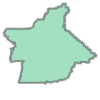

In [52]:
NamedArea_obj.geometry

In [32]:
df = usa.data_collections

# print a few rows of the DataFrame
df.head()

,analysisVariable,alias,fieldCategory,vintage
dataCollectionID,,,,
1yearincrements,1yearincrements.AGE0_CY,2021 Population Age <1,2021 Age: 1 Year Increments (Esri),2021
1yearincrements,1yearincrements.AGE1_CY,2021 Population Age 1,2021 Age: 1 Year Increments (Esri),2021
1yearincrements,1yearincrements.AGE2_CY,2021 Population Age 2,2021 Age: 1 Year Increments (Esri),2021
1yearincrements,1yearincrements.AGE3_CY,2021 Population Age 3,2021 Age: 1 Year Increments (Esri),2021
1yearincrements,1yearincrements.AGE4_CY,2021 Population Age 4,2021 Age: 1 Year Increments (Esri),2021


In [48]:
from arcgis.geoenrichment import enrich, BufferStudyArea
enrich??

```
Signature:
enrich(
    study_areas,
    data_collections=None,
    analysis_variables=None,
    comparison_levels=None,
    add_derivative_variables=None,
    intersecting_geographies=None,
    return_geometry=True,
    gis=None,
)
```

In [49]:
BufferStudyArea??

```
Init signature:
BufferStudyArea(
    area=None,
    radii=None,
    units=None,
    overlap=True,
    travel_mode=None,
)
Docstring:     
BufferStudyArea allows you to buffer point and street address study areas.

Parameters:
area: the point geometry or street address (string) study area to be buffered
radii: list of distances by which to buffer the study area, eg. [1, 2, 3]
units: distance unit, eg. Miles, Kilometers, Minutes (when using drive times/travel_mode)
overlap: boolean, uses overlapping rings when True, or non-overlapping disks when False
travel_mode: None or string, one of the supported travel modes when using network service areas, eg. Driving, Trucking, Walking.
```

## Take-aways

Modules:
 - GIS
 - Features
 - Geometry
 - Mapping
 - Geoenrichment

Dixie Fire (User Story)
 - Use existing Feature Layers on Living Atlas (org/enterprise)
 - Geometry derived from Features or Geoenrichment module
 - Facts about places and people can be extracted via geoenrichment's `enrich` function
 - map.draw() and map.add_layer()
 
Answering questions of:
 - What counties are affected by Dixie Fire?
 - What other fires are in these counties?
 - Which Interstate Highways are impacted?
 - What wilderness protected areas are hampered?
 - Secondary and local roads that might be influenced by the fire?
 - Service areas (Fire Dept) to rescue the Dixie Fire
 - Population groups that might be most vulnerable

## Resources:

Guide:
https://developers.arcgis.com/python/guide

Samples:
https://developers.arcgis.com/python/sample-notebooks

Discussions:
https://community.esri.com/t5/products/ct-p/products

Log an issue:
https://github.com/Esri/arcgis-python-api/issues